## OpenCV

OpenCV (Open Source Computer Vision Library) is an open-source software library that provides a collection of tools and functions for real-time computer vision, machine learning, and image processing

In [7]:
# to install opencv

!pip install opencv-python

In [8]:
# import opencv
import cv2

array([[[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [227, 222, 223],
        [227, 222, 223],
        [227, 222, 223]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [227, 222, 223],
        [227, 222, 223],
        [227, 222, 223]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [227, 222, 223],
        [227, 222, 223],
        [227, 222, 223]],

       ...,

       [[235, 235, 235],
        [234, 234, 234],
        [232, 232, 232],
        ...,
        [223, 223, 223],
        [223, 223, 223],
        [223, 223, 223]],

       [[235, 235, 235],
        [234, 234, 234],
        [232, 232, 232],
        ...,
        [223, 223, 223],
        [223, 223, 223],
        [223, 223, 223]],

       [[235, 235, 235],
        [234, 234, 234],
        [232, 232, 232],
        ...,
        [223, 223, 223],
        [223, 223, 223],
        [223, 223, 223]]], dtype=uint8)
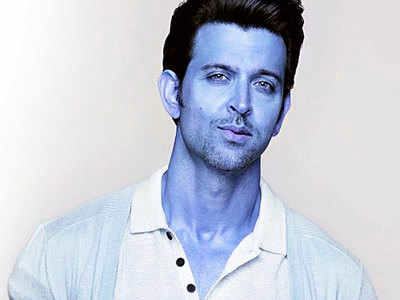

In [9]:
# read image

image = cv2.imread("/content/Hritik.jpeg")
image

array([[254, 254, 254, ..., 224, 224, 224],
       [254, 254, 254, ..., 224, 224, 224],
       [254, 254, 254, ..., 224, 224, 224],
       ...,
       [235, 234, 232, ..., 223, 223, 223],
       [235, 234, 232, ..., 223, 223, 223],
       [235, 234, 232, ..., 223, 223, 223]], dtype=uint8)
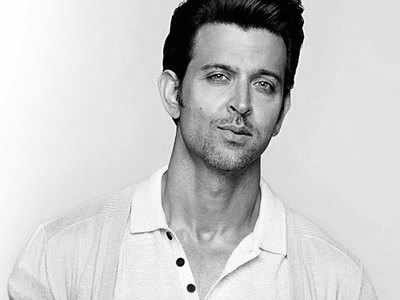

In [11]:
# convert image to gray color

gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
gray

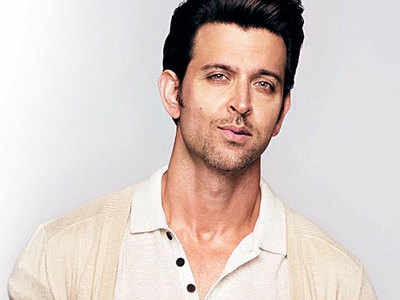

In [14]:
# Display images
from google.colab.patches import cv2_imshow

cv2_imshow(image)

In [17]:
# Wait for a key press and close all windows

# cv2.waitKey(0)  # Wait indefinitely until a key is pressed
# cv2.destroyAllWindows()  # Close all OpenCV windows

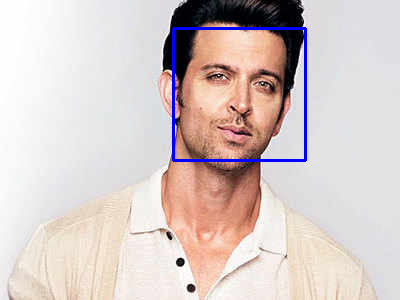

In [34]:
# Face detect

# Step 1: Load the image
image = cv2.imread('/content/Hritik.jpeg')  # Replace with your image path

# Step 2: Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 3: Load a pre-trained Haar Cascade classifier for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Step 4: Detect faces in the image
faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=1, minSize=(15, 15))

# Step 5: Draw rectangles around the detected faces
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)

# Step 6: Display the result
cv2_imshow(image)

# # Step 7: Wait for a key press and close all windows
# cv2.waitKey(0)
# cv2.destroyAllWindows()


In [ ]:
import cv2

# Step 1: Load the Haar Cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Step 2: Start the webcam feed
cap = cv2.VideoCapture("/content/VID20230702182406.mp4")  # '0' indicates the default webcam

while True:
    # Step 3: Read a frame from the webcam
    ret, frame = cap.read()

    # Check if the frame was successfully captured
    if not ret:
        print("Failed to grab frame")
        break

    # Step 4: Convert the frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Step 5: Detect faces in the grayscale image
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Step 6: Draw rectangles around the detected faces
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)

    # Step 7: Display the frame with detected faces
    cv2_imshow(frame)

    # Step 8: Break the loop if the user presses the 'q' key
    # if cv2.waitKey(1) & 0xFF == ord('q'):
    #     break

# Step 9: Release the webcam and close any OpenCV windows
cap.release()
# cv2.destroyAllWindows()


In [ ]:
import cv2

# Step 1: Load the pre-trained deep learning model for face detection
model = cv2.dnn.readNetFromCaffe('deploy.prototxt', 'res10_300x300_ssd_iter_140000_fp16.caffemodel')

# Step 2: Start the webcam feed
cap = cv2.VideoCapture("/content/VID20230702182406.mp4")  # '0' for default webcam

while True:
    # Step 3: Read a frame from the webcam
    ret, frame = cap.read()

    if not ret:
        print("Failed to grab frame")
        break

    # Step 4: Prepare the frame for DNN (resize and normalize)
    h, w = frame.shape[:2]
    blob = cv2.dnn.blobFromImage(frame, 1.0, (300, 300), (104.0, 177.0, 123.0), swapRB=False, crop=False)
    model.setInput(blob)

    # Step 5: Detect faces in the frame
    detections = model.forward()

    # Step 6: Draw rectangles around detected faces
    for i in range(detections.shape[2]):
        confidence = detections[0, 0, i, 2]

        # Only consider detections with confidence greater than a threshold (e.g., 0.5)
        if confidence > 0.5:
            # Get the coordinates of the face
            x1 = int(detections[0, 0, i, 3] * w)
            y1 = int(detections[0, 0, i, 4] * h)
            x2 = int(detections[0, 0, i, 5] * w)
            y2 = int(detections[0, 0, i, 6] * h)

            # Draw a rectangle around the face
            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Step 7: Display the frame with the detected faces
    cv2_imshow(frame)

    # Step 8: Break the loop if the user presses 'q'
    # if cv2.waitKey(1) & 0xFF == ord('q'):
        # break

# Step 9: Release the webcam and close OpenCV windows
cap.release()
cv2.destroyAllWindows()


In [43]:
# crop faces

import cv2

# Load the image
image = cv2.imread('/content/Hritik.jpeg')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Load the pre-trained Haar Cascade Classifier for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Detect faces in the grayscale image
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Check if faces are detected
if len(faces) > 0:
    # Crop the first detected face (if there are multiple, you can loop through the list)
    x, y, w, h = faces[0]
    cropped_face = image[y:y+h, x:x+w]

    # Save the cropped face image
    cv2.imwrite('cropped_face.jpg', cropped_face)
    print("Face detected and saved as 'cropped_face.jpg'")
else:
    print("No faces detected.")


Face detected and saved as 'cropped_face.jpg'


In [45]:
# Image

array([[[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [227, 222, 223],
        [227, 222, 223],
        [227, 222, 223]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [227, 222, 223],
        [227, 222, 223],
        [227, 222, 223]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [227, 222, 223],
        [227, 222, 223],
        [227, 222, 223]],

       ...,

       [[235, 235, 235],
        [234, 234, 234],
        [232, 232, 232],
        ...,
        [223, 223, 223],
        [223, 223, 223],
        [223, 223, 223]],

       [[235, 235, 235],
        [234, 234, 234],
        [232, 232, 232],
        ...,
        [223, 223, 223],
        [223, 223, 223],
        [223, 223, 223]],

       [[235, 235, 235],
        [234, 234, 234],
        [232, 232, 232],
        ...,
        [223, 223, 223],
        [223, 223, 223],
        [223, 223, 223]]], dtype=uint8)
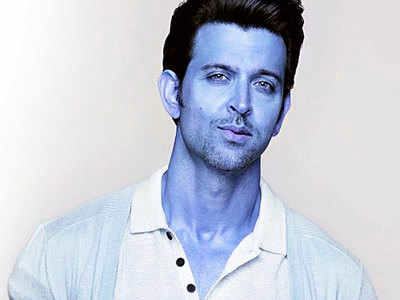

In [47]:
#Reading an image: Using cv2.imread(), you can load images from files.

image = cv2.imread('/content/Hritik.jpeg')
image

In [48]:
# Writing an image: Save the processed image back to a file using cv2.imwrite().

cv2.imwrite('output.jpg', image)

True

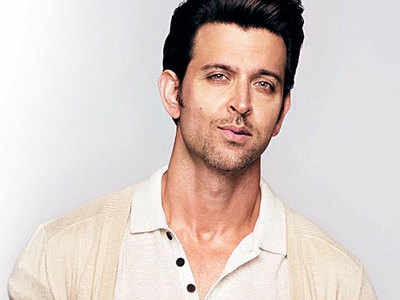

In [51]:
# Show an image: Using cv2.imshow(), you can display an image in a window.

cv2_imshow(image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

array([[254, 254, 254, ..., 223, 223, 223],
       [254, 254, 254, ..., 223, 223, 223],
       [254, 254, 254, ..., 223, 223, 223],
       ...,
       [235, 234, 232, ..., 223, 223, 223],
       [235, 234, 232, ..., 223, 223, 223],
       [235, 234, 232, ..., 223, 223, 223]], dtype=uint8)
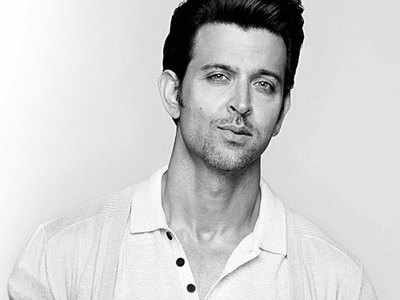

In [53]:
# Images are stored in NumPy arrays, which are matrices (height, width, channels).
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_image

In [57]:
# Resizing: You can resize an image using cv2.resize(image, (w, h)).

resized_image = cv2.resize(image, (15, 8))
resized_image.shape

(8, 15, 3)

In [58]:
# Cropping: To crop an image, simply use NumPy array slicing.

# cropped_image = image[y1:y2, x1:x2]

In [59]:
# Flipping: Flip images horizontally or vertically.

flipped_image = cv2.flip(image, 1)  # Horizontal flip

array([[[227, 222, 223],
        [227, 222, 223],
        [227, 222, 223],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[227, 222, 223],
        [227, 222, 223],
        [227, 222, 223],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[227, 222, 223],
        [227, 222, 223],
        [227, 222, 223],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       ...,

       [[223, 223, 223],
        [223, 223, 223],
        [223, 223, 223],
        ...,
        [232, 232, 232],
        [234, 234, 234],
        [235, 235, 235]],

       [[223, 223, 223],
        [223, 223, 223],
        [223, 223, 223],
        ...,
        [232, 232, 232],
        [234, 234, 234],
        [235, 235, 235]],

       [[223, 223, 223],
        [223, 223, 223],
        [223, 223, 223],
        ...,
        [232, 232, 232],
        [234, 234, 234],
        [235, 235, 235]]], dtype=uint8)
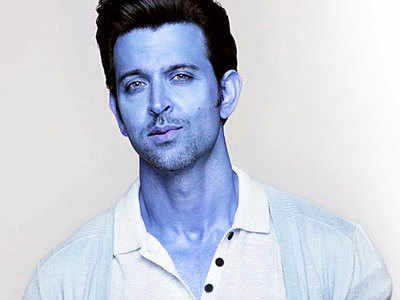

In [60]:
flipped_image

In [61]:
# Rotation: You can rotate an image using cv2.getRotationMatrix2D() and cv2.warpAffine().

# matrix = cv2.getRotationMatrix2D((cx, cy), angle, scale)
# rotated_image = cv2.warpAffine(image, matrix, (width, height))

In [62]:
# Addition, subtraction, and other operations:
# You can perform pixel-wise operations between images or between an image and a constant.

# result = cv2.add(image1, image2)  # Addition of two images
# result = cv2.subtract(image, 50)  # Subtracting a scalar value

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
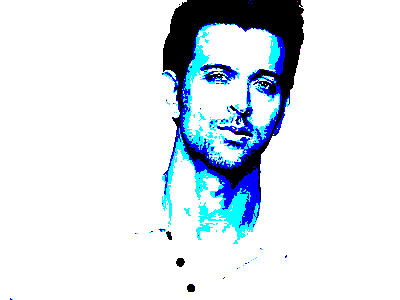

In [63]:
# Binary thresholding: You can threshold an image to separate objects from the background.

_, thresholded_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
thresholded_image

In [64]:
# Blurring and Filtering
# Gaussian Blur: Smooth the image using cv2.GaussianBlur().

blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

array([[[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [227, 222, 223],
        [227, 222, 223],
        [227, 222, 223]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [227, 222, 223],
        [227, 222, 223],
        [227, 222, 223]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [227, 222, 223],
        [227, 222, 223],
        [227, 222, 223]],

       ...,

       [[234, 234, 234],
        [234, 234, 234],
        [232, 232, 232],
        ...,
        [223, 223, 223],
        [223, 223, 223],
        [223, 223, 223]],

       [[234, 234, 234],
        [234, 234, 234],
        [232, 232, 232],
        ...,
        [223, 223, 223],
        [223, 223, 223],
        [223, 223, 223]],

       [[234, 234, 234],
        [234, 234, 234],
        [232, 232, 232],
        ...,
        [223, 223, 223],
        [223, 223, 223],
        [223, 223, 223]]], dtype=uint8)
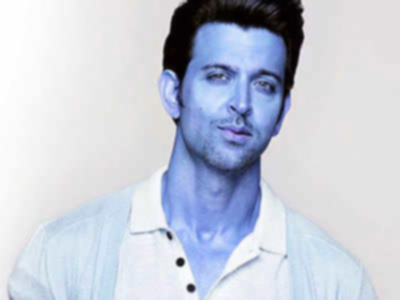

In [65]:
blurred_image

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
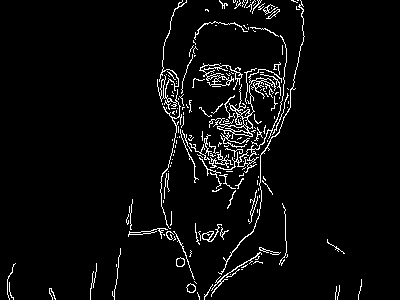

In [67]:
# Edge detection: Detect edges using the Canny edge detector.

edges = cv2.Canny(image, 100, 200)
edges

array([[[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [227, 222, 223],
        [227, 222, 223],
        [227, 222, 223]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [227, 222, 223],
        [227, 222, 223],
        [227, 222, 223]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [227, 222, 223],
        [227, 222, 223],
        [227, 222, 223]],

       ...,

       [[235, 235, 235],
        [234, 234, 234],
        [232, 232, 232],
        ...,
        [223, 223, 223],
        [223, 223, 223],
        [223, 223, 223]],

       [[235, 235, 235],
        [234, 234, 234],
        [232, 232, 232],
        ...,
        [223, 223, 223],
        [223, 223, 223],
        [223, 223, 223]],

       [[235, 235, 235],
        [234, 234, 234],
        [232, 232, 232],
        ...,
        [223, 223, 223],
        [223, 223, 223],
        [223, 223, 223]]], dtype=uint8)
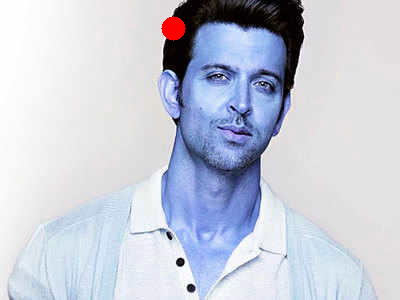

In [70]:
# Finding contours: Use cv2.findContours() to detect the contours of shapes in an image.

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Now apply findContours to the grayscale image
contours, _ = cv2.findContours(gray_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Drawing shapes: You can draw geometric shapes such as circles, rectangles, and lines.

radius = 12
cv2.circle(image, (x, y), radius, (255, 0, 0), -1)  # Assuming x and y are defined
cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Assuming x1, y1, x2, y2 are defined

array([[255, 255, 255, ..., 117, 117, 117],
       [255, 255, 255, ..., 117, 117, 117],
       [255, 255, 255, ..., 117, 117, 117],
       ...,
       [196, 194, 186, ..., 117, 117, 117],
       [196, 194, 186, ..., 117, 117, 117],
       [196, 194, 186, ..., 117, 117, 117]], dtype=uint8)
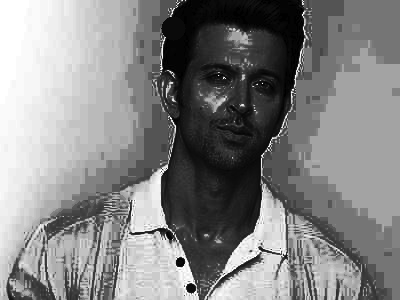

In [72]:
# Calculating histograms: A histogram shows the distribution of pixel values (intensity).

histogram = cv2.calcHist([image], [0], None, [256], [0, 256])

# Histogram equalization: Enhance the contrast of an image.

# Convert the image to grayscale before applying histogram equalization
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
equalized_image = cv2.equalizeHist(gray_image) # Pass the grayscale image to equalizeHist

equalized_image

In [ ]:
# Harris Corner Detection: Detect corners in an image.

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Harris corner detection to the grayscale image
corners = cv2.cornerHarris(gray_image, 2, 3, 0.04)

# ORB (Oriented FAST and Rotated BRIEF): Detect keypoints and compute descriptors.

orb = cv2.ORB_create()
keypoints, descriptors = orb.detectAndCompute(image, None)
keypoints

array([[ 66, 139, 254, ..., 208, 133, 109],
       [138,  26, 158, ...,  96,  37, 243],
       [210,  13,  30, ...,  64, 173,  14],
       ...,
       [170,  90, 226, ...,  92,  61, 223],
       [ 59, 171,  99, ..., 142, 250, 213],
       [ 42, 250, 106, ...,  28, 125, 223]], dtype=uint8)
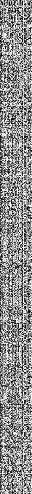

In [75]:
descriptors

In [79]:
# Creating a mask: You can apply a mask to an image to isolate certain regions.
lower_bound = 2; upper_bound=2;
mask = cv2.inRange(image, lower_bound, upper_bound)
result = cv2.bitwise_and(image, image, mask=mask)

In [ ]:
result

In [81]:
# Video

In [102]:
cap = cv2.VideoCapture('/content/VID20230702182406.mp4')
if not cap.isOpened():
    print("Error: Could not open video.")


In [88]:
# cap = cv2.VideoCapture(0)  # 0 for default webcam


In [ ]:
while True:
    ret, frame = cap.read()  # Read a frame
    if not ret:
        break  # If frame reading fails, exit the loop

    # Perform processing on the frame (e.g., converting to grayscale)
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Show the frame in a window
    cv2_imshow(gray_frame)

    # Wait for key press, exit loop if 'q' is pressed
    # if cv2.waitKey(1) & 0xFF == ord('q'):
    #     break

cap.release()  # Release the video capture object
# cv2.destroyAllWindows()  # Close all OpenCV windows


In [ ]:
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)
print(f"Width: {frame_width}, Height: {frame_height}, FPS: {fps}")

In [ ]:
fourcc = cv2.VideoWriter_fourcc(*'XVID')  # Codec (e.g., XVID, MJPG)
out = cv2.VideoWriter('output.avi', fourcc, fps, (frame_width, frame_height))

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Process the frame (optional)
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Write the processed frame to the output video
    out.write(gray_frame)

    # Display the processed frame
    cv2.imshow('Processed Frame', gray_frame)

    # Exit loop on pressing 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
out.release()
cv2.destroyAllWindows()


In [ ]:
# resized_frame = cv2.resize(frame, (new_width, new_height))
# flipped_frame = cv2.flip(frame, 1)  # Horizontal flip
# blurred_frame = cv2.GaussianBlur(frame, (5, 5), 0)
# edges = cv2.Canny(frame, 100, 200)



In [ ]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

while True:
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)

    cv2.imshow('Video - Face Detection', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


In [ ]:
# Example: applying a perspective transform to each frame
# M = cv2.getPerspectiveTransform(src_points, dst_points)  # Define source and destination points
# warped_frame = cv2.warpPerspective(frame, M, (frame_width, frame_height))


In [ ]:
# Parameters for optical flow calculation
lk_params = dict(winSize=(15, 15), maxLevel=2, criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

# Detect good features to track in the first frame
prev_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
prev_pts = cv2.goodFeaturesToTrack(prev_gray, mask=None, **feature_params)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    next_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    next_pts, status, error = cv2.calcOpticalFlowPyrLK(prev_gray, next_gray, prev_pts, None, **lk_params)

    # Visualize the optical flow (draw lines connecting the points)
    for i, (next_pt, prev_pt) in enumerate(zip(next_pts, prev_pts)):
        x1, y1 = prev_pt.ravel()
        x2, y2 = next_pt.ravel()
        frame = cv2.line(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)

    cv2.imshow('Optical Flow', frame)

    prev_gray = next_gray.copy()
    prev_pts = next_pts

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


In [ ]:
fps = cap.get(cv2.CAP_PROP_FPS)  # Get original frame rate
delay = int(1000 / fps)  # Delay between frames (in milliseconds)

while True:
    ret, frame = cap.read()
    if not ret:
        break
    cv2.imshow('Video', frame)
    if cv2.waitKey(delay) & 0xFF == ord('q'):
        break


In [ ]:
bg_subtractor = cv2.createBackgroundSubtractorMOG2()
while True:
    ret, frame = cap.read()
    if not ret:
        break

    fg_mask = bg_subtractor.apply(frame)  # Get foreground mask
    cv2.imshow('Foreground Mask', fg_mask)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
